<a href="https://www.kaggle.com/code/faizulislam19095/logistic-regression-in-ml-explained-in-details?scriptVersionId=158269801" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**🍁 The agenda of this notebook is to provide** 
* **A solid understanding and intuition about Logistic Regression**
* **An overview of how sigmoid function works!**
* **Hands on implementation Logistic Regression algorithm on Customer Churn dataset.**
* **The advantages and limitations of Logistic Regression**

<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Concept of Logistic Regression</div>


Logistic Regression is a fundamental and widely used algorithm in the field of machine learning, particularly for binary classification problems. Despite its name, logistic regression is used for classification, not regression. It's a supervised learning algorithm that predicts the probability of an instance belonging to a particular class.Logistic regression is primarily designed for binary classification tasks where the target variable has two classes, often labeled as 0 and 1. Examples include spam or not spam, fraud or not fraud, etc.Unlike linear regression, which predicts continuous values, logistic regression models the probability of an instance belonging to a certain class. This model leverages the logistic (or sigmoid) function to transform real-valued inputs into a probability range of [0, 1]. The sigmoid function's characteristic S-shaped curve ensures that the output remains bounded, facilitating a clear interpretation of class probabilities.In contrast to linear regression, logistic regression does not predict continuous values but focuses on estimating the likelihood of an instance belonging to a particular class. The training process involves maximizing the likelihood of observing the given outcomes under the assumed logistic distribution, achieved through techniques like maximum likelihood estimation.

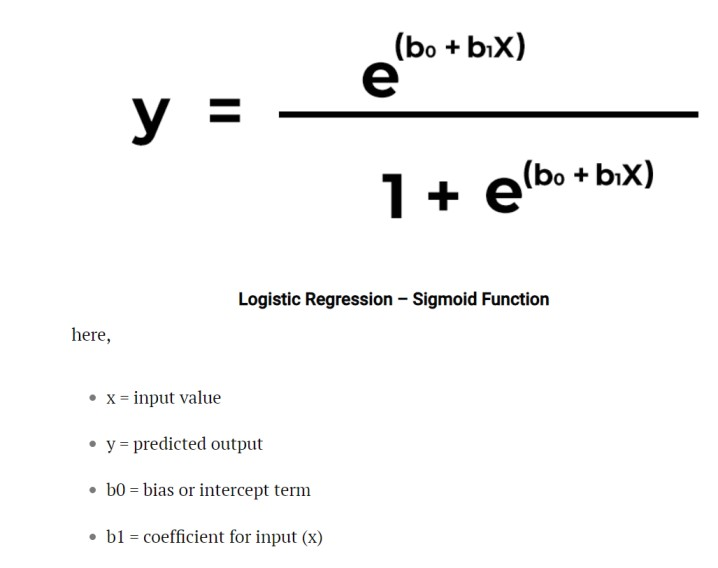

<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Sigmoid function</div>


The sigmoid function, also known as the logistic function, is a crucial component in logistic regression. Its primary role is to transform a linear combination of input features into a probability score between 0 and 1.The sigmoid function's characteristic S-shaped curve ensures that its output is bounded within the [0,1] range. As z becomes large and positive e^-z approaches zero, causing σ(z) to approach 1.Conversely, as z becomes large and negative e^-z becomes large causing σ(z) to approach 0.Interpreting the output of the sigmoid function as a probability, σ(z) can be understood as the likelihood of an instance belonging to the positive class in binary classification problems. If σ(z) is close to 1, the model predicts a high probability of the positive class, while a value close to 0 indicates a low probability. The decision boundary, which determines the class assignment, is typically set at 0.5.

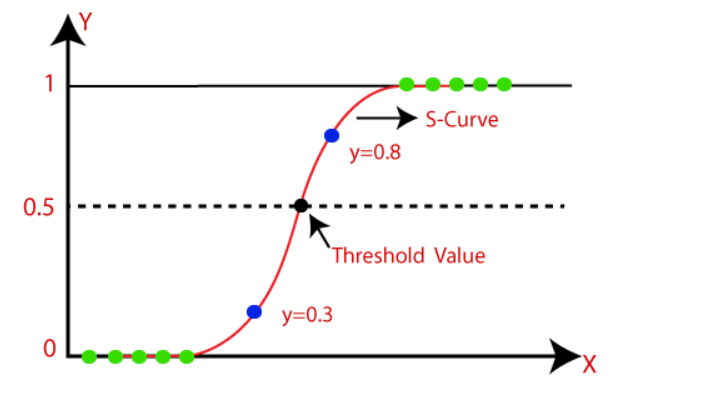

# Assumptions of Logistic Regression:



- **Binary Outcome:**
  - The dependent variable should be binary, representing two classes (0 and 1).

- **Independence of Observations:**
  - The observations in the dataset should be independent of each other.

- **Linearity of Log-Odds:**
  - The relationship between the independent variables and the log-odds of the dependent variable should be linear.

- **No Multicollinearity:**
  - Independent variables should not be highly correlated with each other (no multicollinearity).

- **Large Sample Size:**
  - Logistic regression performs well with a reasonably large sample size for stable parameter estimates.

- **Absence of Outliers:**
  - The absence of influential outliers that could unduly influence the estimation.

- **Assumption of Homoscedasticity:**
  - The variance of the error term should be constant across all levels of the independent variables.

- **Absence of Perfect Separation:**
  - The independent variables should not perfectly predict the outcome for any subset of the data.

- **Linearity of Log-Odds and Independent Variables:**
  - The assumption of linearity extends to the relationship between the log-odds and the independent variables.

- **Appropriate Model Fit:**
  - The logistic regression model should be an appropriate fit for the underlying structure of the data.

It's important to check these assumptions before interpreting the results of logistic regression to ensure the reliability of the model. Violations of these assumptions may affect the accuracy and generalizability of the logistic regression model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Problem Statement</div>


**The dataset at hand contains a comprehensive set of customer-related features, including contract type, monthly charges, customer satisfaction scores, and historical churn information. The challenge is to leverage logistic regression to develop an accurate predictive model for customer churn. The objective is to identify significant predictors of churn, quantify their impact through logistic regression coefficients, and establish a reliable tool for forecasting which customers are likely to churn.**

In [3]:
df.shape

(7043, 21)

**There are 7043 rows and 21 columns in our dataset**

In [4]:
# Checking the presence of null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Introduction to variables</div>


* **customerID : Customer ID**
* **gender : Whether the customer is a male or a female**
* **SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)**
* **Partner: Whether the customer has a partner or not (Yes, No)**
* **Dependents: Whether the customer has dependents or not (Yes, No)**
* **tenure : Number of months the customer has stayed with the company**
* **PhoneService: Whether the customer has a phone service or not (Yes, No)**
* **MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)**
* **InternetService: Customer’s internet service provider (DSL, Fiber optic, No)**
* **OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)**
* **OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)**
* **DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)**
* **TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)**
* **StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)**
* **StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service**
* **Contract : The contract term of the customer (Month-to-month, One year, Two year)**
* **PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)**
* **PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))**
* **MonthlyCharges : The amount charged to the customer monthly**
* **TotalCharges : The total amount charged to the customer**
* **Churn : Whether the customer churned or not (Yes or No)**

In [5]:
# Checking for the presence of duplicate values
df.duplicated().sum()

0

**So, all good till now! We don't have any null and duplicated values in our dataset!**

In [6]:
# Overview of the entire dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Let's drop the customerID variable because it's not really a valuable information for further analysis

df = df.drop('customerID',axis=1)

In [8]:
df.head() # customerID variable is removed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis (EDA)

In [9]:
fig = px.histogram(df, x="gender",color='gender')
fig.show()

**Female percentage - 49.52%**

**Male percentage - 50.48%**

In [10]:
fig = px.histogram(df, x="PaymentMethod",color='PaymentMethod')
fig.show()

**Most of the people use Electronic check as payment method. The tendency for using other methods are nearly same.**

<Figure size 640x480 with 0 Axes>

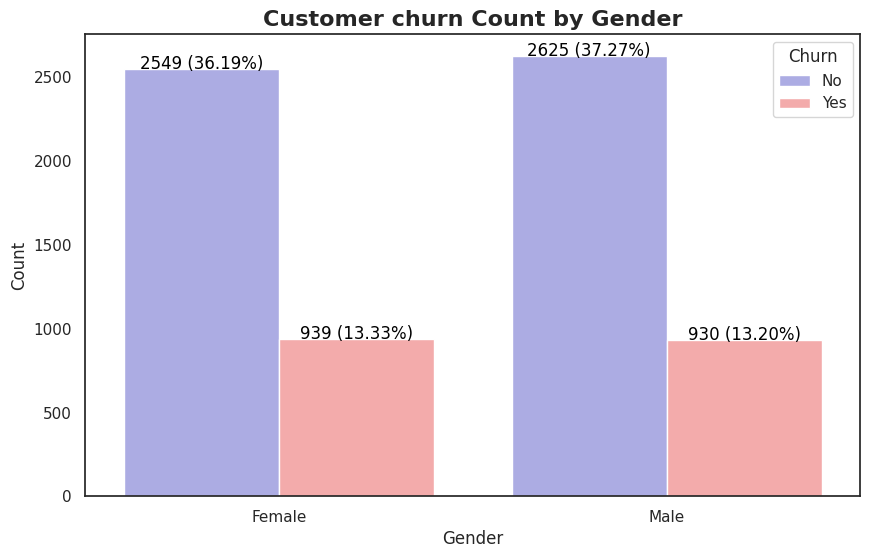

In [11]:
# Customer churn vs gender

df_plot = df.copy()
df_plot['gender'] = df_plot['gender'].replace({1:"Male",2:"Female"})
df_plot['Churn'] = df_plot['Churn'].replace({0:"No",1:"Yes"})
sns.set(style="whitegrid")
sns.set_style("white")
sns.despine()
palette = [ '#a3a3ec','#ff9f9f']
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_plot, x='gender', hue='Churn', palette=palette)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Customer churn Count by Gender", fontsize=16, fontweight='bold')

total_counts = len(df)

for p in ax.patches:
    count = int(p.get_height())
    percentage = f"{100 * count / total_counts:.2f}%"
    ax.annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')

plt.show()

**The plot shows there isn't any notable tendency of churning in any specific gender because the churn percentage for both female and male are almost same.**

In [12]:
fig = px.histogram(df, x="MonthlyCharges", histnorm='probability density')
fig.show()

In [13]:
fig = px.box(df, x="Churn", y="MonthlyCharges", color="Churn")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

**The boxplot suggests differences in the distribution of monthly charges between customers who churned and those who did not. But we can't take any final decision on the basis of boxplot, we have to do some statistical test to test the significance. In order to perform statistical test, first we have to check whether the MonthlyCharges variable is normally distributed or not by using Shapiro-Wilk test.**

* **If normally distributed : We will apply two sample t test**

* **If not normally distributed : We will use Mann-Whiteney U test (which is a non-parametric test)**


**But there's a very important thing to notice, since our number of observations are 7043, which is greater than 5000.
 p-value calculated by the Shapiro-Wilk test may not be accurate for large sample sizes (N > 5000). This is a known limitation of the test, and the accuracy of p-values can be affected by the sample size.**

**In practice, when dealing with very large datasets, even small departures from normality may lead to statistically significant p-values. In such cases, visual inspection of the data (histograms, Q-Q plots, etc.) becomes even more important.**

**However, I'm gonna perform both Shapiro Wilk test and Q-Q plot to show you,but remember in this scenario where number of observation is greater that 5000,Shapiro Wilk test is not so good for testing normality.**

In [14]:
from scipy.stats import shapiro
stat, p_value = shapiro(df['MonthlyCharges'])
print("Shapiro-Wilk Test Statistic:", stat)
print("P-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("The MonthlyCharges variable does not follow a normal distribution (reject the null hypothesis of normality).")
else:
    print("The MonthlyCharges variable follows a normal distribution (fail to reject the null hypothesis of normality).")


Shapiro-Wilk Test Statistic: 0.9208890199661255
P-value: 0.0
The MonthlyCharges variable does not follow a normal distribution (reject the null hypothesis of normality).


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



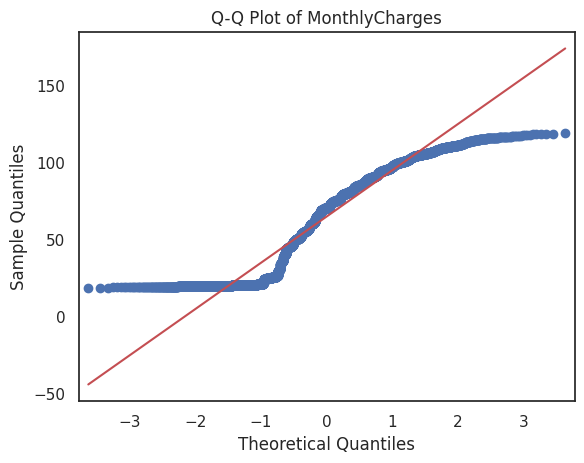

In [15]:
import statsmodels.api as sm
sm.qqplot(df['MonthlyCharges'], line='s')
plt.title('Q-Q Plot of MonthlyCharges')
plt.show()

**So from Q-Q plot it is clearly seen that the MonthlyCharges data is not normally distribute. So we will use Mann-Whiteney U test to test the significance of MonthlyCharges between customer who churned and who didn't.**

In [16]:
from scipy.stats import mannwhitneyu
monthly_charges_churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
monthly_charges_churn_no = df[df['Churn'] == 'No']['MonthlyCharges']
u_stat, p_value_mw = mannwhitneyu(monthly_charges_churn_yes, monthly_charges_churn_no)
print("Mann-Whitney U Statistic:", u_stat)
print("P-value:", p_value_mw)
alpha = 0.05
if p_value_mw < alpha:
    print("There is a significant difference in the distributions of MonthlyCharges between churned and non-churned customers.")
else:
    print("There is no significant difference in the distributions of MonthlyCharges between churned and non-churned customers.")


Mann-Whitney U Statistic: 6003125.5
P-value: 3.311627651988585e-54
There is a significant difference in the distributions of MonthlyCharges between churned and non-churned customers.


**Okay, now we can see that there is a significant difference in the distributions of MonthlyCharges between churned and non-churned customer (which was also shown on ).**
**We can now test whether the monthly charges was greater for churned customer than the non churned customer by using One-sided Mann-Whiteney U test.**

In [17]:
monthly_charges_churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
monthly_charges_churn_no = df[df['Churn'] == 'No']['MonthlyCharges']
u_stat, p_value_mw = mannwhitneyu(monthly_charges_churn_yes, monthly_charges_churn_no, alternative='greater')
print("Mann-Whitney U Statistic:", u_stat)
print("P-value:", p_value_mw)
alpha = 0.05
if p_value_mw < alpha:
    print("The median MonthlyCharges for churned customers is significantly greater than non-churned customers.")
else:
    print("There is no significant evidence that the median MonthlyCharges for churned customers is greater than non-churned customers.")


Mann-Whitney U Statistic: 6003125.5
P-value: 1.6558138259942924e-54
The median MonthlyCharges for churned customers is significantly greater than non-churned customers.


**Voila! The median MonthlyCharges for churned customers is significantly greater than non-churned customers.So the monthly charges can be a factor for customer churn.**

**Before starting the modeling part,**

* **we have to recode all the categorical variables into numeric because we can't feed categorical data to the model**
* **Scale numerical features**

In [18]:
df2 = df.copy()


In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded = df_encoded.astype(int)
df_encoded.head()
df_encoded['Churn'] = df2['Churn']

In [20]:
df_encoded = df_encoded.drop('Churn_Yes',axis=1)
df_encoded = df_encoded.drop('Churn_No',axis=1)

In [21]:
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn
0,0,1,29,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = df_encoded.select_dtypes(include=['int']).columns.tolist()
scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn
0,0.0,0.013889,0.11,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.472222,0.38,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.027778,0.35,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.24,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.52,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Applying Logistic Regression algorithm</div>


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [25]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
logistic_model = LogisticRegression(max_iter=1000)

In [27]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_pred = logistic_model.predict(X_test)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [30]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report_str}")

Accuracy: 0.8246983676366217
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1036
         1.0       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



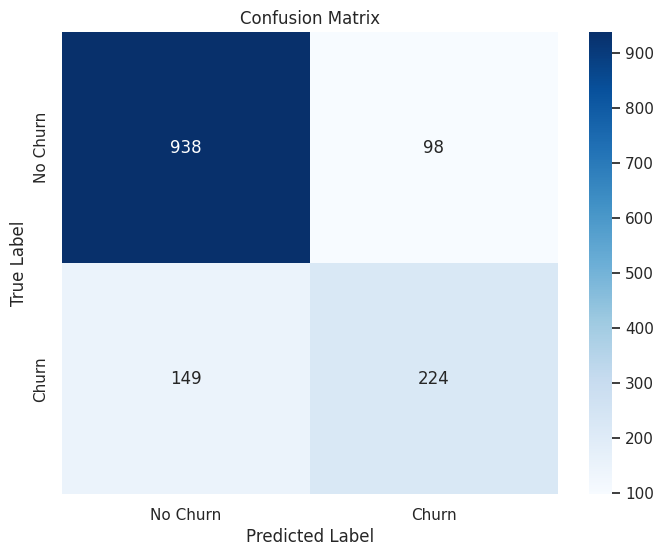

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Advantages of  Logistic Regression</div>


* **Logistic regression coefficients represent the relationship between independent variables and the log-odds of the dependent variable. This makes the model easily interpretable.**
* **Logistic regression is a simple and fast algorithm, making it computationally efficient, particularly for large datasets.**
* **Logistic regression performs well when the classes are linearly separable, meaning the decision boundary can be expressed as a linear combination of features.**
* **Logistic regression models provide probabilities of class membership, allowing for probabilistic predictions rather than just binary outcomes.**
* **Logistic regression does not assume a normal distribution of the input variables.**
* **Logistic regression models typically have low variance compared to more complex algorithms, which can be beneficial in situations with limited data.**

<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Disdvantages of  Logistic Regression</div>


* **Logistic regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable. If the relationship is highly non-linear, logistic regression may not perform well.**
* **Logistic regression can be sensitive to outliers, especially when the decision boundary is affected by extreme values.**
* **Logistic regression may not perform well for datasets with complex, non-linear relationships.**
* **Unlike some other algorithms, logistic regression does not inherently provide feature importance rankings.**
* **Logistic regression is designed for binary classification problems. Although modifications exist for multi-class problems (e.g., one-vs-all), it may not be the best choice for highly multi-class scenarios.**
* **Logistic regression assumes that there is little or no multicollinearity among the independent variables. High multicollinearity can lead to unstable coefficients and unreliable model interpretation.**

<div style="background-color:black; color:white; padding:20px; font-size:24px; font-weight:bold; text-align:left; border-radius:70px;"> 
      If this notebook helps, please consider UPVOTING. Happy learning! 😊 
</div>


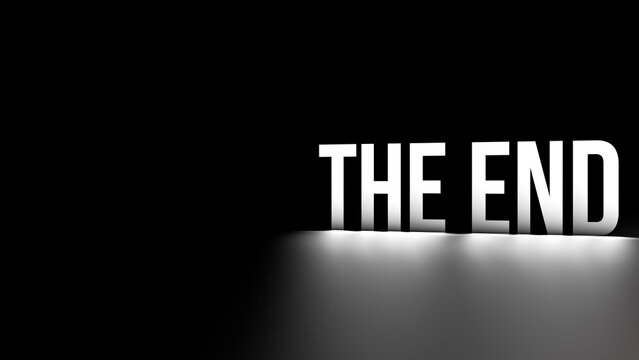